形态学变换主要用于二值图像。

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

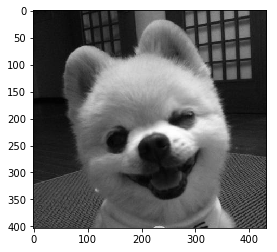

In [2]:
img=cv2.imread(r"E:\ZouBySelf\rotman.jpg") #bgr模式，默认，原图
img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img2,cmap='gray')

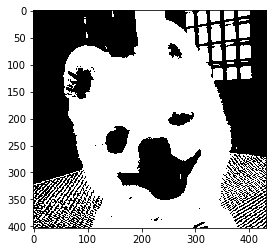

In [3]:
ret,img3=cv2.threshold(img2,70,255,cv2.THRESH_BINARY)
plt.imshow(img3,cmap='gray')

### 腐蚀

其原理为用结构元素与其覆盖的二值图像做 “与” 操作中,所有位置都为1时，结果才为1；否则为0。结果上表示为图像白色区域变瘦，可用于去除噪点、图像切割等。

In [4]:
kernel=np.ones((5,5),np.uint8)
#构造结构元素

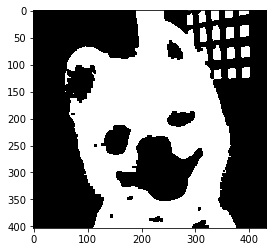

In [5]:
erosion=cv2.erode(img3,kernel,iterations=1)
plt.imshow(erosion,cmap='gray')

### 构造结构元素

除了如上借助numpy构造结构元素外，也可以如下构造矩形、椭圆、十字型等：

In [6]:
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [7]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [8]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### 膨胀

其原理与腐蚀相似，不过是在做“或”运算。常伴随腐蚀出现，或用于图像修复。

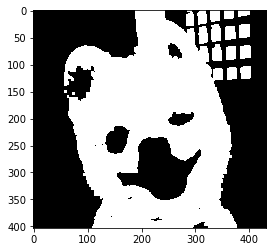

In [9]:
dilation = cv2.dilate(erosion,kernel,iterations = 1)
plt.imshow(dilation,cmap='gray')

如下为图像与后的显示：

(<matplotlib.axes._subplots.AxesSubplot at 0x1fcee0c8128>,
 <matplotlib.text.Text at 0x1fcee108978>)

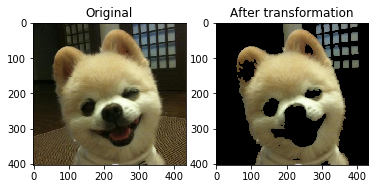

In [10]:
img4=cv2.bitwise_and(img,img,mask=dilation)
plt.subplot('121'),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot('122'),plt.imshow(cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)),plt.title('After transformation')

### 开运算

其为如上所述的侵蚀后扩张，用于消除如白色噪点。

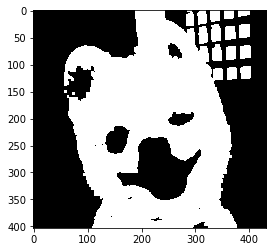

In [11]:
opening = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')

### 闭运算

同上相反，其为如上所述的扩张后侵蚀，用于消除如黑色噪点。

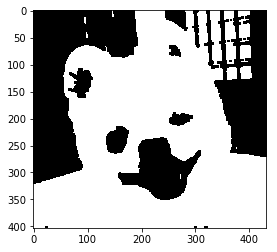

In [12]:
closing = cv2.morphologyEx(img3, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')

### 形态学梯度

梯度和导数密切相关,图像返回近似轮廓。

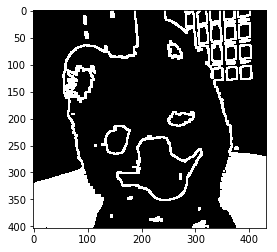

In [13]:
gradient = cv2.morphologyEx(img3, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient,cmap='gray')

### 顶帽变换

其内容为从原有的图像中减去开运算后的图像。顶帽运算往往用来分离比邻近点亮一些的斑块，当一幅图像具有大幅的背景的时候，而微小物品比较有规律的时候，可以用顶帽运算进行背景提取。

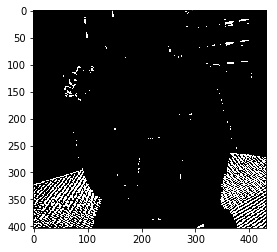

In [14]:
tophat = cv2.morphologyEx(img3, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat,cmap='gray')

### 黑帽变换

其意义为闭运算的结果图与原图像之差。黑帽运算后的效果图突出了比原图轮廓周围的区域更暗的区域，且这一操作和选择的核的大小相关。所以，黑帽运算用来分离比邻近点暗一些的斑块。

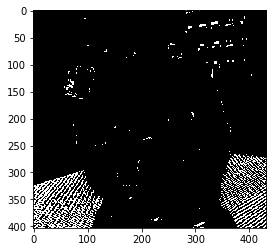

In [15]:
blackhat = cv2.morphologyEx(img3, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat,cmap='gray')